# **<center>Fase de exploracion</center>**

## **Configuracion del entorno**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# URL del archivo en GitHub
url = 'https://raw.githubusercontent.com/ipsilon7/Analisis-de-datos-de-IMDb/refs/heads/main/Database/IMDb%20database.csv'

# Cargar el archivo CSV desde GitHub
df = pd.read_csv(url)

## **Exploracion inicial del dataset**

Usaremos el método «shape» para verificar el tamaño del set de datos. La salida dara como resultado la cantidad de registros y columnas (registros, columnas):

In [2]:
print(df.shape)

(1029446, 7)


Ahora imprimimos las 5 primeras filas, lo que nos permitirá tener una idea general de las características de esta tabla:

In [3]:
df.head()

,id,title,type,genres,averageRating,numVotes,releaseYear
0,tt0000009,Miss Jerry,movie,Romance,5.4,215.0,1894.0
1,tt0000147,The Corbett-Fitzsimmons Fight,movie,"Documentary, News, Sport",5.2,539.0,1897.0
2,tt0000502,Bohemios,movie,NaN,4.4,18.0,1905.0
3,tt0000574,The Story of the Kelly Gang,movie,"Action, Adventure, Biography",6.0,939.0,1906.0
4,tt0000591,The Prodigal Son,movie,Drama,5.7,28.0,1907.0


Ahora necesitamos entender los tipos de variables que tenemos (es decir el tipo de dato usado para almacenar la información en cada columna de nuestra tabla). Esto lo podemos verificar usando el método «info()», que ademas nos dira cuantos registros no nulos tiene cada columna:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029446 entries, 0 to 1029445
Data columns (total 7 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   id             1029446 non-null  object 
 1   title          1029446 non-null  object 
 2   type           1029446 non-null  object 
 3   genres         928808 non-null   object 
 4   averageRating  439071 non-null   float64
 5   numVotes       439071 non-null   float64
 6   releaseYear    900924 non-null   float64
dtypes: float64(3), object(4)
memory usage: 55.0+ MB


<br>
EL metodo info() nos devolvio la siguiente informacion:<br>
<br>
class='pandas.core.frame.DataFrame'<br>
RangeIndex: 1029446 entries, 0 to 1029445<br>
Data columns (total 7 columns):<br>

|#|Column|Non-Null count|Dtype|
|-----|-----|-----|-----|
|0|id|1029446 non-null|object|
|1|title|         1029444 non-null|  object |
|2|  type|           1029446 non-null|  object |
|3|  genres|         928808 non-null|   object |
|4|  averageRating|  439071 non-null|   float64|
|5|  numVotes| 439071 non-null|   float64|
|6|   releaseYear|    900924 non-null|   float64|

dtypes: float64(3), object(4)
memory usage: 55.0+ MB


Podemos ver que las columnas "id" y "type" tienen la misma cantidad de registros que el total por lo que no hay datos faltantes. La columna "title" tiene solamente dos registros faltantes, que habria que inspeccionar si no se trata de algun tipo de error. Luego las columnas de "averageRating" y "numVotes" contienen la misma cantidad de datos faltantes debido a que estan correlacionadas y un dato no menor es que menos de la mitad (42,65% para ser exactos) del dataset contiene datos de puntuacion y cantidad de votos. Por ultimo, las columnas de generos y año de lanzamiento tambien tienen datos faltantes. El porcentaje de datos faltantes por columna quedaria de la siguiente manera:

| Columna       | % de datos faltantes |
|---------------|:--------------------:|
| id            | 0%     |
| title         |< 0,01% |
| type          | 0%     |
| genres        | 9,77%  |
| averageRating | 57,34% |
| numVotes      | 57,34% |
| releaseYear   | 12,48% |

<br>
Ahora representaremos los datos faltantes mediante un heatmap para poder visualizar si hay alguna relacion entre ellos.

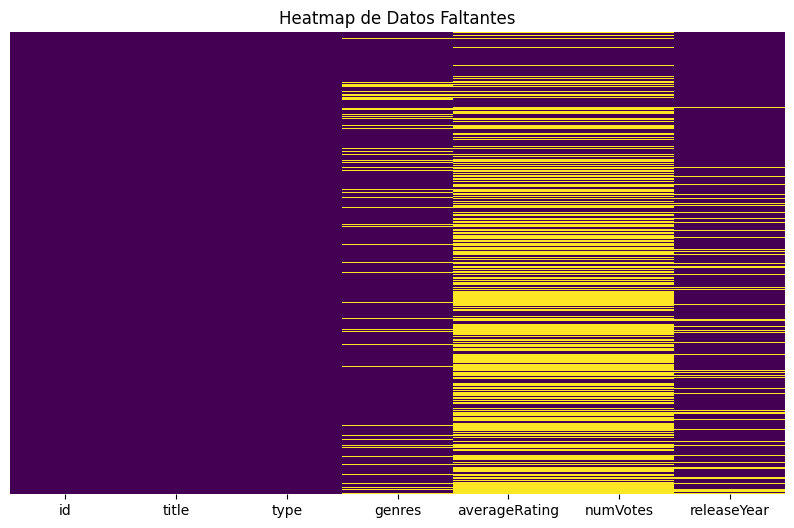

In [5]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Heatmap de Datos Faltantes")
plt.show()

Haremos unas pruebas para entender las relaciones de estos datos faltantes. Como se habia dicho anteriormente averageRating y numVotes comparten datos faltantes porque estan correlacionados. Primero filtraremos registros con solo datos faltantes en releaseYear.

In [6]:
# Filtrar filas donde solo 'releaseYear' tiene datos faltantes
filtered_df = df[df['releaseYear'].isna() & df.drop(columns=['releaseYear']).notna().all(axis=1)]

print(f"Cantidad de registros filtrados: {filtered_df.shape[0]}")
print(filtered_df)

Cantidad de registros filtrados: 90
                id                                              title  \
134590   tt0203086  Home-Coming in Granddaughter: The Cultural Com...   
143229   tt0219466                                          90° South   
172648   tt0278332                        The Adventures of Pinocchio   
202588   tt0346172                      Zamaanat: And Justice for All   
230072   tt0417131                                       Shubh Kaamna   
...            ...                                                ...   
971946   tt8325358                                          One Night   
971955   tt8325484                                      Frankensitter   
992999   tt9013026                               This Guest of Summer   
1013261  tt9710724                        Bay Lawz: Stick to the Code   
1016336  tt9823122                              Mannphodganj Ki Binny   

             type                  genres  averageRating  numVotes  \
134590      movie

<br>
Ahora filtraremos registros con solo datos faltantes en la columna generes.

In [7]:
# Filtrar filas donde solo 'genres' tiene datos faltantes
filtered_df = df[df['genres'].isna() & df.drop(columns=['genres']).notna().all(axis=1)]

print(f"Cantidad de registros filtrados: {filtered_df.shape[0]}")
print(filtered_df)

Cantidad de registros filtrados: 14724
                 id                                              title  \
2         tt0000502                                           Bohemios   
14        tt0000862                                         Faldgruben   
25        tt0001010  Protección de un convoy de víveres en el puent...   
27        tt0001038                                 Sherlock Holmes VI   
36        tt0001101                         Abraham Lincoln's Clemency   
...             ...                                                ...   
1022743  tt33704378                           Fugitives Caught on Tape   
1022799  tt33710320                                       USAshveloebi   
1026159  tt34278653                          She Taught Me Serendipity   
1027432  tt34387986                                            Nilgoon   
1027488  tt34388850                                           Vanchana   

             type genres  averageRating  numVotes  releaseYear  
2      

<br>
Por ultimo filtraremos registros donde solo falten los datos de las columnas averageRating y numVotes.
<br>

In [8]:
# Filtrar filas donde solo 'averageRating' y 'numVotes' tienen datos faltantes
filtered_df = df[
    df[['averageRating', 'numVotes']].isna().all(axis=1)  # Ambas columnas tienen datos faltantes
    & df.drop(columns=['averageRating', 'numVotes']).notna().all(axis=1)  # Las demás columnas no tienen datos faltantes
]

print(f"Cantidad de registros filtrados: {filtered_df.shape[0]}")
print(filtered_df)

Cantidad de registros filtrados: 384938
                 id                              title          type  \
31        tt0001059           O Terremoto de Benavente         movie   
45        tt0001147  O Centenário da Guerra Peninsular         movie   
47        tt0001163                   Corrida da Rampa         movie   
58        tt0001341         Jarní sen starého mládence         movie   
60        tt0001359                A Pesca do Bacalhau         movie   
...             ...                                ...           ...   
1029435  tt34604833            Halloween Mind Massacre         movie   
1029436  tt34605760                         Souled Out  tvMiniSeries   
1029438  tt34605792                        Nie przegap      tvSeries   
1029440  tt34605805                    39 Derecede Ask         movie   
1029444  tt34606065                         Victor 303         movie   

                  genres  averageRating  numVotes  releaseYear  
31           Documentary      

## **Fase de limpieza**

### **Datos faltantes**

#### **Columna title**

Iniciaremos por averiguar cuales son esos dos registros que no tienen titulo:

In [9]:
# Filtrar filas donde 'title' es NaN o está vacío
missing_title_rows = df[df['title'].isna()]

# Mostrar las filas con datos faltantes en 'title'
print(missing_title_rows)

Empty DataFrame
Columns: [id, title, type, genres, averageRating, numVotes, releaseYear]
Index: []


<br>
Los dos registros en los que falta el titulo son los siguientes:

|id|title|type|genres|averageRating|numVotes|releaseYear|
|---------------|----|----|----|----|----|----|
|tt17042812|NaN|movie|Thriller|NaN|NaN|2010|
|tt5774076|NaN|movie|Action, Drama, Mystery|7.2|7.0|2015.0|

Ambos registros que no contenia titulo era debido a que el titulo de las peliuclas era "None" y era interpretado por Python como un dato nulo, por lo que se procedio a modificarlo quedando de la siguiente manera:

|id|title|type|genres|averageRating|numVotes|releaseYear|
|---------------|----|----|----|----|----|----|
|tt17042812|"No-ne"|movie|Thriller|NaN|NaN|2010|
|tt5774076|"No-ne"|movie|Action, Drama, Mystery|7.2|7.0|2015.0|

#### **Columna year**

Como pudimos ver en la exploracion inicial, el 57,34% de los registros no tienen puntacion por lo que trataremos de optimizar estos datos faltantes. La base de datos que estamos trabajando contiene datos de producciones con puntuaciones que realiza el publico. Teniendo en cuenta esto y sabiendo que nos encontramos en el año 2024, todas aquellas producciones despues de esta fecha es probable que no tengan dato de puntuacion porque todavia no han sido estrenadas. Filtraremos las producciones con año de lanzamiento 2025 y luego filtraremos aquellas que no contenga datos de puntuacion para poder comparar entre si. Los registros que no tengan datos de puntuacion seran eliminados.

In [12]:
# Filtrar registros donde 'releaseYear' sea 2025
filtered_df = df[df['releaseYear'] == 2025]

print(f"Cantidad de registros de 2025: {filtered_df.shape[0]}")

# Filtrar registros donde 'releaseYear' sea 2025 y 'averageRating' tenga valores faltantes
filtered_df = df[(df['releaseYear'] == 2025) & (df['averageRating'].isna())]

print(f"Cantidad de registros de 2025 sin puntuacion: {filtered_df.shape[0]}")

# Filtrar registros donde 'releaseYear' sea 2025 y 'averageRating' tenga datos
filtered_df = df[(df['releaseYear'] == 2025) & (df['averageRating'].notna())]

print(f"Cantidad de registros de 2025 con puntuacion: {filtered_df.shape[0]}")
print(filtered_df)

Cantidad de registros de 2025: 2439
Cantidad de registros de 2025 sin puntuacion: 2424
Cantidad de registros de 2025 con puntuacion: 15
                id                                   title          type  \
396467  tt13334970          Ghost Story - An Abstract Film         movie   
412842  tt13794972                                Dr. Gift         movie   
492535  tt16275832                         Lost Recipes S1      tvSeries   
496802  tt16450020                         Operation Dagon         movie   
503521   tt1692249                            A Savior Red         movie   
516466   tt1784356                     Bayen Haath Ka Khel         movie   
550116  tt20202896               Sacred Grounds: Forbidden         movie   
579176  tt21818782                                  Tehran         movie   
633326   tt2633610                          Occupy Cannes!         movie   
634763  tt26439870                  Sardi Ki Phusphusaahat         movie   
757430  tt32832561  In Cold 

### **Columnas genres + averageRating + releaseYear**

Si hay registros que tienen datos faltas en estas 3 columnas, procederemos a eliminarlos porque son demasiados datos que faltan, por lo que no sirven para el analisis que queremos realizar. Primero filtraremos para ver cuantos registros son:

In [ ]:
# Filtrar filas donde las 3 columnas tienen datos faltantes al mismo tiempo
missing_data_rows = df[df[['genres', 'averageRating', 'releaseYear']].isna().all(axis=1)]

# Contar el número total de filas con datos faltantes en estas columnas
missing_data_count = missing_data_rows.shape[0]

print(f"Cantidad total de filas con datos faltantes en 'genres', 'averageRating' y 'releaseYear' al mismo tiempo: {missing_data_count}")
print("Registros con datos faltantes:\n", missing_data_rows)

Cantidad total de filas con datos faltantes en 'genres', 'averageRating' y 'releaseYear' al mismo tiempo: 8889
Registros con datos faltantes:
                  id                                           title      type  \
78184     tt0103493  Millennium: Tribal Wisdom and the Modern World  tvSeries   
89821     tt0120922                                 Artes e Ofícios  tvSeries   
89977     tt0121158                                        Complica     movie   
89981     tt0121172                                     Cuo zai cuo     movie   
89982     tt0121173                           The Curly-Headed Dude     movie   
...             ...                                             ...       ...   
1029318  tt34587446                                    Jävla Karlar  tvSeries   
1029323  tt34587487     Untitled Vicky Kaushal/Dinesh Vijan Project     movie   
1029431  tt34604810                             Gods Premier League     movie   
1029434  tt34604827                            

<br>
Nos da como resultados un total de 8889 registros (el 0,86% del total de registros). Se realizo una investigacion de estas producciones en la web de IMDb y algunas de ellas se trataban de producciones que todavia se encontraban en etapa de produccion o preproduccion, es decir que todavia no se habian estrenado. Eliminaremos estos registros de la siguiente manera:

In [ ]:
# Eliminar estas filas del DataFrame original
df = df.drop(missing_data_rows.index)

### **Datos repetidos**

In [ ]:
# Contar filas duplicadas en la columna 'id'
num_duplicates = df.duplicated(subset='id').sum()

if num_duplicates == 0:
    print("No se encontraron registros duplicados en la columna 'id'.")
else:
    print(f"Se encontraron {num_duplicates} registros duplicados en la columna 'id'.")

    # Mostrar las filas duplicadas
    duplicated_rows = df[df.duplicated(subset='id', keep=False)]
    print("Filas duplicadas basadas en la columna 'id':")
    print(duplicated_rows)

    # Eliminar duplicados y conservar la primera ocurrencia
    df = df.drop_duplicates(subset='id', keep='first')

No se encontraron registros duplicados en la columna 'id'.


<br>
No hay registros duplicados en este dataset.

### **Manejo de outliers en variables numericas**

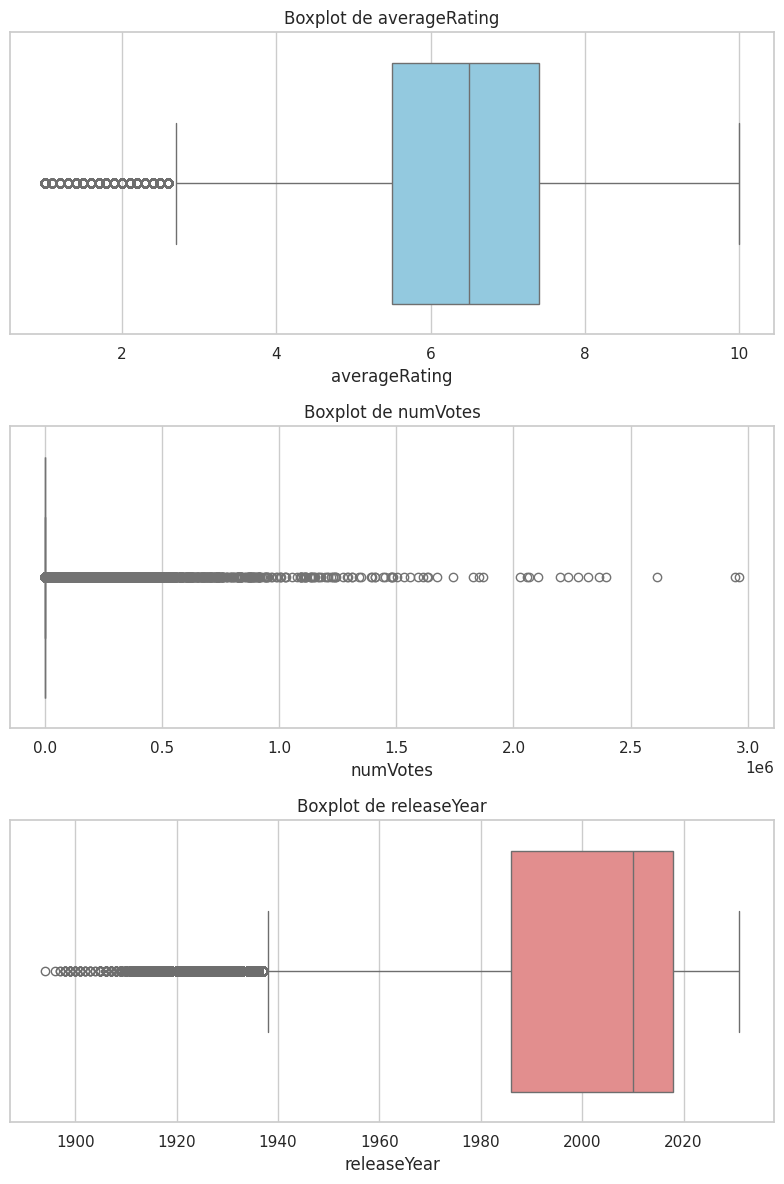

In [ ]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear un subplot para los 3 boxplots (en vertical)
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

# Boxplot para 'averageRating' (horizontal)
sns.boxplot(x=df['averageRating'], ax=axes[0], color='skyblue')
axes[0].set_title('Boxplot de averageRating')
axes[0].set_xlabel('averageRating')

# Boxplot para 'numVotes' (horizontal)
sns.boxplot(x=df['numVotes'], ax=axes[1], color='lightgreen')
axes[1].set_title('Boxplot de numVotes')
axes[1].set_xlabel('numVotes')

# Boxplot para 'releaseYear' (horizontal)
sns.boxplot(x=df['releaseYear'], ax=axes[2], color='lightcoral')
axes[2].set_title('Boxplot de releaseYear')
axes[2].set_xlabel('releaseYear')

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

<br>
Teniendo en cuenta el tipo de variables numericas y de analisis que queremos realizar, no considero que los valores por fuera del rango de los bigotes del boxplot puedan ser tomados como outliers, por lo que los datos se conservaran.

### **Renombrando columnas de camelcase a snakecase**

<br>
Se renombraran algunos de los nomnbres de las columnas para que se adecuen al estilo snakecase porque es claro, estándar y ampliamente utilizado en SQL.

In [ ]:
# Renombrar columnas específicas
df = df.rename(columns={
    'averageRating': 'average_rating',
    'numVotes': 'num_votes',
    'releaseYear': 'release_year'
})

### **Division de la columna genero**

La columna genres cuenta con hasta tres tipos de generos distintos en un mismo campo, si se lo dejara asi no podria ser utilizada para el analisis, por lo que se separa cada genero en una columna. En caso de que una produccion cuente con menos de 3 generos, los campos quedaran vacios. Por ejemplo, un registro que cuenta con 2 generos solamente quedaria de la siguiente manera:

|genre1|genre2|genre3|
|-----|-----|-----|
|Drama|Action|None|

Los campos que no contengan genero tendran valores NaN, que es el valor nulo estandar de Pandas.

In [ ]:
# Dividir la columna 'género' en varias columnas
genres_split = df['genres'].str.split(',', expand=True)

# Renombrar las columnas resultantes
genres_split.columns = [f'genre{i+1}' for i in range(genres_split.shape[1])]

# Concatenar las nuevas columnas con el dataframe original
df = pd.concat([df, genres_split], axis=1)

# Eliminar la columna 'genres' original
df = df.drop(columns=['genres'])

### **Errores tipográficos en variables categóricas**

Para hacer una revision de las variables categoricas, primero vamos a ver la cantidad de generos unicos que hay y ordenarlos alfabeticamente, de esa forma tambien descartaremos que no haya algun error tipografico en alguno de ellos.

In [ ]:
# Seleccionar las columnas de géneros
genres_columns = ['genre1', 'genre2', 'genre3']

# Combinar las columnas de géneros y eliminar valores nulos
unique_genres = pd.unique(df[genres_columns].values.ravel())

# Filtrar los valores no nulos
unique_genres = [genre for genre in unique_genres if pd.notna(genre)]

# Ordenar los géneros alfabéticamente
unique_genres = sorted(unique_genres)

# Mostrar la cantidad de géneros únicos y los géneros ordenados
print(f"Cantidad de géneros únicos: {len(unique_genres)}")
print(f"Géneros únicos (ordenados): {unique_genres}")

Cantidad de géneros únicos: 55
Géneros únicos (ordenados): [' Adult', ' Adventure', ' Animation', ' Biography', ' Comedy', ' Crime', ' Documentary', ' Drama', ' Family', ' Fantasy', ' Film-Noir', ' Game-Show', ' History', ' Horror', ' Music', ' Musical', ' Mystery', ' News', ' Reality-TV', ' Romance', ' Sci-Fi', ' Short', ' Sport', ' Talk-Show', ' Thriller', ' War', ' Western', 'Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Game-Show', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show', 'Thriller', 'War', 'Western']


Nos da como resultado 55 generos unicos. Revisando los resultados el error que se encontro es que hay generos repetidos debido a que uno contiene un espacio delante del genero y el otro no lo tiene, tomandolos como dos generos distintos. Primero eliminares el espacio en blanco delante de los generos, como tambien de todas las demas columnas de tipo texto y luego volveremos a ver la cantidad de generos.



In [ ]:
# Eliminar espacios en blanco solo en las columnas de tipo objeto (texto)
df = df.apply(lambda col: col.str.strip() if col.dtype == 'object' else col)

# Seleccionar las columnas de géneros
genres_columns = ['genre1', 'genre2', 'genre3']

# Combinar las columnas de géneros y eliminar valores nulos
unique_genres = pd.unique(df[genres_columns].values.ravel())

# Filtrar los valores no nulos
unique_genres = [genre for genre in unique_genres if pd.notna(genre)]

# Ordenar los géneros alfabéticamente
unique_genres = sorted(unique_genres)

# Mostrar la cantidad de géneros únicos y los géneros ordenados
print(f"Cantidad de géneros únicos: {len(unique_genres)}")
print(f"Géneros únicos (ordenados): {unique_genres}")

Cantidad de géneros únicos: 28
Géneros únicos (ordenados): ['Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Game-Show', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show', 'Thriller', 'War', 'Western']


Podemos ver que se redujo la cantidad de generos a practicamente la mitad, dandonos un total de 28 generos.

### **Transformacion de columnas num_votes y year a tipo entero**

Cuando Pandas hizo la transformacion del archivo csv a dataframe, las columnas num_votes y year contenian campos vacios por lo que Pandas los tomo como valores NaN que son de tipo flotante (float). Si una columna contiene números enteros y al menos un valor faltante, Pandas convertirá toda la columna al tipo float64, ya que int no puede representar valores faltantes. Por lo que volveremos a convertir en entero estas columnas para que el tipo de dato coincida con la base de datos que tendremos creada en SQL.

In [ ]:
# Mantener las columnas con números enteros como enteros (excepto la columna average_rating que es flotante)
for column in df.select_dtypes(include=['float64']).columns:
    if column != "average_rating":
        df[column] = df[column].fillna(0).astype('int')